# Лабораторная работа №1.

## Условие

Вариант №13.

Распределения: 

$$\mathbf{X_1} \sim R(-5, 5)$$

$$\mathbf{X_2} \sim R(-5, 5)$$

Объёмы выборок:

$$ n_1 = 300$$

$$ n_2 = 300 $$


Статистическая гипотеза $H_0$:

$$m_1 = m_2\ (\sigma_1,\sigma_2\text{ — не известны})$$

## Импорты

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from time import time
from IPython.display import display, Math, Markdown  # для вывода формул в консоль

ModuleNotFoundError: No module named 'numpy'

## Определения

In [2]:
a1, b1, n1 = -5, 5, 300
a2, b2, n2 = -5, 5, 300


In [31]:
def mprint(*strings):
    for s in strings:
        display(Markdown(s))


import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(404)  

mpl.rcParams['text.usetex'] = False

mpl.rcParams['text.latex.preamble'] = r''

plt.style.use("seaborn-v0_8")


## 1. Исходные данные

| СВ             | Распределение | Параметры              | Математическое ожидание, $m_i$   | Дисперсия, $\sigma_i^2$                                     |
| -------------- | ------------- | ---------------------- | -------------------------------- | ----------------------------------------------------------- |
| $\mathbf{X_1}$ | $R(-5, 5)$    | $a_1 = -5, b_1 = 5$    | $m_1 = \dfrac{a_1 + b_1}{2} = 0$ | $\sigma_1^2 = \dfrac{(b_1 - a_1)^2}{12} = \dfrac{100}{12}$ |
| $\mathbf{X_2}$ | $R(-5, 5)$    | $a_2 = -5, b_2 = 5$    | $m_2 = \dfrac{a_2 + b_2}{2} = 0$ | $\sigma_2^2 = \dfrac{(b_2 - a_2)^2}{12} = \dfrac{100}{12}$ |


In [9]:
X1 = np.random.uniform(a1, b1, n1)
X2 = np.random.uniform(a2, b2, n2)

mprint(f"$\\mathbf{{X1}}$: {X1[:10].round(2)}")
mprint(f"$\\mathbf{{X2}}$: {X2[:10].round(2)}")

$\mathbf{X1}$: [ 1.69 -1.49  3.93 -2.22 -4.48  4.18 -0.28 -4.94 -0.12  3.41]

$\mathbf{X2}$: [-1.94 -4.47 -2.55 -3.07 -4.87 -1.98  1.35  4.54  2.94 -1.14]

### Выборочные характеристики

Мы имеем выборку, нам нужно рассчитать **несмещенную** оценку с.к.о. и дисперсии, поэтому применяем формулы:

$$ s = \sqrt{\dfrac{1}{n - 1} \sum\limits_{i = 1}^{n} (x_i - \overline{x})^2} $$
$$ s^2 = \dfrac{1}{n - 1} \sum\limits_{i = 1}^{n} (x_i - \overline{x})^2 $$

Множитель $\dfrac{1}{n - a}$  в `numpy` достигается передачей параметра `ddof=a`, в данном случае `ddof=1`. 

In [11]:
mean1 = X1.mean()
s1 = X1.std(ddof=1)
S1 = X1.var(ddof=1)

mean2 = X2.mean()
s2 = X2.std(ddof=1)
S2 = X2.var(ddof=1)

# было: np.concat
X_pooled = np.concatenate((X1, X2))
mean_pooled = X_pooled.mean()
s_pooled = X_pooled.std(ddof=1)
S_pooled = X_pooled.var(ddof=1)

mprint(
    f"$\\overline{{x_1}} =$ {mean1:.2f}, $s_1^2 =$ {S1:.2f}, $s_1$ = {s1:.2f}, $n_1 =$ {n1}"
)
mprint(
    f"$\\overline{{x_2}} =$ {mean2:.2f}, $s_2^2 =$ {S2:.2f}, $s_2$ = {s2:.2f}, $n_2 =$ {n2}"
)
mprint(
    f"$\\overline{{x_{{pooled}}}} =$ {mean_pooled:.2f}, $s_{{pooled}}^2 =$ {S_pooled:.2f}, $s_{{pooled}}$ = {s_pooled:.2f}, $n_{{pooled}} =$ {n1 + n2}",
)


$\overline{x_1} =$ 0.06, $s_1^2 =$ 7.89, $s_1$ = 2.81, $n_1 =$ 300

$\overline{x_2} =$ -0.03, $s_2^2 =$ 8.38, $s_2$ = 2.90, $n_2 =$ 300

$\overline{x_{pooled}} =$ 0.01, $s_{pooled}^2 =$ 8.13, $s_{pooled}$ = 2.85, $n_{pooled} =$ 600

| СВ            | Среднее, $\overline{x_i}$ | Оценка дисперсии, $s_i^2$ | Оценка с.к.о., $s_i$ | Объём выборки, $n_i$ |
| ------------- | ------------------------- | ------------------------- | -------------------- | -------------------- |
| $\mathbf{X1}$ | 0.06                      | 7.89                      | 2.81                 | 300                  |
| $\mathbf{X2}$ | -0.03                      | 8.38                      | 2.90                 | 300                  |
| Pooled        | 0.01                      | 8.13                      | 2.85                 | 600                  |


## 2. Однопараметрические критерии

В начале лабы мы генерировали выборку по какому-то распределению. Теперь мы хотим поработать с библиотечными функциями проверки гипотез. Поэтому для различных функций будем ставить заранее верную нулевую гипотезу: просто ставить параметры изначального распределения. 

В данном случае ошибка может быть только 1-го рода: мы даём верную гипотезу, заранее зная это, но статистическое решение может отвергнуть её. Поэтому мы будем вписывать в поле "ошибка статистического решения" значение "да" только тогда, когда по $p$ value мы должны отвергать гипотезу.

In [12]:
alpha = 0.05
m0 = 0
std0 = sqrt(100 / 12)


def verdict(alpha, p_value):
    if alpha > p_value:
        return "$H_0$ отклоняется"
    else:
        return "$H_0$ принимается"

### z-test

Мы используем данную статистику критерия, когда основная гипотеза $H_0$ связана со значением математического ожидания распределения, из которого мы взяли выборку. При этом $\sigma$ считается известной.


Я не нашел адекватной библиотечной функции, которая проверяет гипотезу с известным $\sigma$, поэтому напишу её сам.

$$ Z = \dfrac{\overline{X} - m_0}{\frac{\sigma}{\sqrt{n}}} $$

Так как критическая область двусторонняя, то выражение для $p$ value примет вид:
$$ p = 2\min(F_Z(z_{выб} \mid H_0), 1 - F_Z(z_{выб} \mid H_0)) $$

In [13]:
def ztest(X, value, std):
    mean = X.mean()
    n = len(X)
    z = (mean - value) / (std / sqrt(n))
    cdf = stats.norm.cdf(z)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

В данном случае $H_0 = m_0 = 0$ - я просто предположил, что математическое ожидание распределения по выборке действительно совпадает с математическим ожиданием равномерного распределения при таких параметрах (см. [табличку](#1-исходные-данные)).

In [14]:
z, p_value = ztest(X1, m0, std0)

mprint(
    r"### Z-test",
    f"$H_0: m_1 = m_0 = {m0}$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value)
)

### Z-test

$H_0: m_1 = m_0 = 0$

$z_{выб} =$ 0.36

$p =$ 0.72

$H_0$ принимается

### t-test

Отличается от [`Z-test`](#z-test) тем, что $\sigma$ неизвестна, и считается её выборочное значение под капотом. Тут уже есть библиотечные функции.

In [15]:
z, p_value = stats.ttest_1samp(X1, m0)

mprint(
    r"### T-test",
    f"$H_0: m_1 = m_0 = {m0}$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value),
)

### T-test

$H_0: m_1 = m_0 = 0$

$z_{выб} =$ 0.37

$p =$ 0.71

$H_0$ принимается

### $\chi^2$-test ($m$ известно)

Мы используем данную статистику критерия, когда основная гипотеза $H_0$ связана со значением $\sigma$ распределения, из которого мы взяли выборку. При этом $m$ считается известной.

Опять же я не нашёл библиотечных функций конкретно для этого случая, поэтому опять написал функцию по лекции:

$$ Z = \dfrac{n \cdot S_0^2}{\sigma_0^2} $$

$$ S_0^2 = \frac{1}{n} \cdot \sum\limits_{i=1}^{n} (X_i - m)^2 $$

Так как критическая область двусторонняя($Z$ не сильно должно отличаться от $n$ при истинности $H_0$):
$$ p = 2\min(F_Z(z_{выб} \mid H_0), 1 - F_Z(z_{выб} \mid H_0)) $$

In [16]:
def S_0(X, m):
    n = len(X)
    return np.sum((X - m) ** 2) / n


def chisquare(X, value, m):
    n = len(X)
    z = n * S_0(X, m) / value**2
    cdf = stats.chi2.cdf(z, n)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

In [17]:
z, p_value = chisquare(X1, std0, m0)
mprint(
    r"### $\chi^2$-test ($m$ известно)",
    f"$H_0: \\sigma_1 = \\sigma_0 = {std0:.2f}$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value)
)

### $\chi^2$-test ($m$ известно)

$H_0: \sigma_1 = \sigma_0 = 2.89$

$z_{выб} =$ 283.28

$p =$ 0.50

$H_0$ принимается

### $\chi^2$-test ($m$ неизвестно)

Отличается от [$\chi^2$-test c известным $m$](#-test--известна) тем, что считается выборочное значение $m$ под капотом. Библиотечных функций опять не завезли :(

In [18]:
def chisquare(X, value):
    n = len(X)
    z = (n - 1) * X.var(ddof=1) / value**2
    cdf = stats.chi2.cdf(z, n - 1)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

In [19]:
z, p_value = chisquare(X1, std0)

mprint(
    r"### $\chi^2$-test ($m$ неизвестно)",
    f"$H_0: \\sigma_1 = \\sigma_0 = {std0:.2f}$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value),
)

### $\chi^2$-test ($m$ неизвестно)

$H_0: \sigma_1 = \sigma_0 = 2.89$

$z_{выб} =$ 283.15

$p =$ 0.53

$H_0$ принимается

### Табличка

| Тест                         | Статистическая гипотеза, $H_0$                 | Выборочное значение статистики критерия | p-value | Статистическое решение при $\alpha = 0.05$ | Ошибка статистического решения |
| ---------------------------- | ---------------------------------------------- | --------------------------------------- | ------- | ------------------------------------------ | ------------------------------ |
| z-test                       | $m_1 = m_0 = 0$($\sigma$ известна)                   | 0.36                                   | 0.72    | $H_0$ принимается                          | Нет                            |
| t-test                       | $m_1 = m_0 = 0$($\sigma$ неизвестна)                 | 0.37                                   | 0.71    | $H_0$ принимается                          | Нет                            |
| $\chi^2$-test ($m$ известно) | $\sigma_1 = \sigma_0 = 2.89 $ ($m$ известно) | 283.28                                   | 0.50    | $H_0$ принимается                          | Нет                            |
| $\chi^2$-test ($m$ неизвестно) | $\sigma_1 = \sigma_0 = 2.89 $ ($m$ неизвестно) | 283.15                                   | 0.53    | $H_0$ принимается                          | Нет                            |


## 3. Двухвыборочные критерии

### 2-sample t-test

In [20]:
z, p_value = stats.ttest_ind(X1, X2)

mprint(
    r"### 2-sample t-test",
    f"$H_0: m_1 = m_2$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value)
)

### 2-sample t-test

$H_0: m_1 = m_2$

$z_{выб} =$ 0.40

$p =$ 0.69

$H_0$ принимается

### 2-sample F-test ($m$ известно)

In [21]:
def Ftest(X1, X2, m1, m2):
    n1 = len(X1)
    n2 = len(X2)
    z = S_0(X1, m1) / S_0(X2, m2)
    cdf = stats.f.cdf(z, dfn=n1, dfd=n2)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

In [22]:
z, p_value = Ftest(X1, X2, m0, m0)

mprint(
    r"### 2-sample F-test ($m$ известно)",
    f"$H_0: \\sigma_1 = \\sigma_2$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value)
)

### 2-sample F-test ($m$ известно)

$H_0: \sigma_1 = \sigma_2$

$z_{выб} =$ 0.94

$p =$ 0.60

$H_0$ принимается

### 2-sample F-test ($m$ неизвестно)

In [23]:
def Ftest(X1, X2):
    n1 = len(X1)
    n2 = len(X2)
    z = X1.var(ddof=1) / X2.var(ddof=1)
    cdf = stats.f.cdf(z, dfn=n1 - 1, dfd=n2 - 1)
    p_value = 2 * min(cdf, 1 - cdf)
    return z, p_value

In [24]:
z, p_value = Ftest(X1, X2)

mprint(
    r"### 2-sample F-test ($m$ неизвестно)",
    f"$H_0: \\sigma_1 = \\sigma_2$",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value)
)

### 2-sample F-test ($m$ неизвестно)

$H_0: \sigma_1 = \sigma_2$

$z_{выб} =$ 0.94

$p =$ 0.60

$H_0$ принимается

### Табличка

| Тест                             | Статистическая гипотеза, $H_0$ | Выборочное значение статистики критерия | p-value | Статистическое решение при $\alpha = 0.05$ | Ошибка статистического решения |
| -------------------------------- | ------------------------------ | --------------------------------------- | ------- | ------------------------------------------ | ------------------------------ |
| 2-sample t-test                  | $m_1 = m_2$                    | 0.40                                    | 0.69    | $H_0$ принимается                          | Нет                            |
| 2-sample F-test ($m$ известно)   | $\sigma_1 = \sigma_2$          | 0.94                                    | 0.60    | $H_0$ принимается                          | Нет                            |
| 2-sample F-test ($m$ неизвестно) | $\sigma_1 = \sigma_2$          | 0.94                                    | 0.60    | $H_0$ принимается                          | Нет                            |

## 4. Исследование распределений статистик критерия

Статистическая гипотеза $H_0$: $m_1 = m_2\ (\sigma_1,\sigma_2\text{ — не известны})$

Формула расчёта статистики критерия $T$ (критерий Уэлча):
$$ T = \dfrac{\overline{X}_1 - \overline{X}_2}{\sqrt{\dfrac{S_1^2}{n_1} + \dfrac{S_2^2}{n_2}}} $$

Формула расчёта статистики $P$-value: $p = 2\min(F_T(t_{выб} \mid H_0), 1 - F_T(t_{выб} \mid H_0))$

Число серий экспериментов $N = 1000$

### Теоретические характеристики:

| СВ           | Распределение в условиях $H_0$ | Параметры     | Математическое ожидание | Дисперсия           | С.к.о |
| ------------ | ------------------------------ | ------------- | ----------------------- | ------------------- | ----- |
| $\mathbf{T}$ | t-распределение                | $\nu = 598$ | 0                       | $\nu/(\nu-2) \approx 1.003$ | $\approx 1.002$     |
| $P$-value    | R(0, 1)                        |               | $\frac{1}{2} = 0.5$             | $\frac{1}{12} \sim 0.083$ | $\frac{1}{\sqrt{12}} \sim 0.288 $ |


### Выборочные характеристики

In [25]:
N = 1000
np.random.seed(404)
T = np.empty(N)
P = np.empty(N)

for i in range(N):
    X1 = np.random.uniform(a1, b1, n1)
    X2 = np.random.uniform(a2, b2, n2)
    # Welch's t-test
    t, p_value = stats.ttest_ind(X1, X2, equal_var=False)
    T[i] = t
    P[i] = p_value

mprint(f"$T[:10]=$ {T[:10].round(2)}", f"$P[:10]=$ {P[:10].round(2)}")


$T[:10]=$ [ 0.4  -1.73 -0.14  0.53  0.58 -0.71  0.86 -1.61  0.99  0.46]

$P[:10]=$ [0.69 0.08 0.88 0.6  0.56 0.48 0.39 0.11 0.32 0.65]

In [26]:
mean_t = T.mean()
st = T.std(ddof=1)
St = T.var(ddof=1)

mean_p = P.mean()
sp = P.std(ddof=1)
Sp = P.var(ddof=1)

mprint(
    f"$\\overline{T} =$ {mean_t:.2f}",
    f"$s_t^2 =$ {St:.2f}",
    f"$s_t =$ {st:.2f}",
    f"$\\overline{P} =$ {mean_p:.2f}",
    f"$s_p^2 =$ {Sp:.2f}",
    f"$s_p =$ {sp:.2f}",
)


$\overline[ 4.00213642e-01 -1.72898991e+00 -1.44983350e-01  5.27775857e-01
  5.79200699e-01 -7.10687983e-01  8.63507257e-01 -1.60917867e+00
  9.88187886e-01  4.57591902e-01  2.06204110e-01  5.18885916e-01
  3.06874261e-01 -8.96672099e-01  1.77000712e+00  1.13145810e+00
 -5.60131354e-01  2.06635042e+00 -9.81531933e-01 -2.96275291e-02
  1.70647961e-01  1.36269732e+00  1.38077180e-01  9.47423080e-01
 -1.98713433e+00  1.11233717e+00 -4.32979801e-01 -1.43627517e+00
  1.78276588e-02  8.95765318e-01  4.23574822e-01 -4.07756252e-01
 -3.84557992e-01  7.17811180e-01  1.10132759e+00 -8.42259387e-01
  4.74653549e-01  4.38264072e-01  8.11876530e-01  3.69971184e-01
  6.38285597e-01 -2.82782580e-01  1.15823208e-01  2.41848945e-01
 -6.36346892e-01  8.38972078e-01 -6.17292954e-01 -1.80264560e-03
 -5.27793459e-01  6.71701784e-02 -1.32574959e-01 -1.51843865e-01
 -4.59387386e-01  5.64269344e-01  4.92325910e-01 -1.57695462e-01
 -4.50790350e-01 -5.68151019e-01 -1.07052494e+00 -1.26548844e+00
  5.47790742e-01 -5.87423208e-01 -1.25756567e+00 -1.32483851e+00
 -1.50964868e-01  2.19028412e-01  2.99542324e-01  1.15886493e+00
 -7.11714641e-01  2.98483444e-01  1.37076361e-01  3.80535881e-01
  1.32579107e+00  2.50130803e-01 -2.96697970e-01 -4.82348221e-01
  4.13471088e-01 -1.73060136e+00  1.04779793e+00 -6.15340412e-01
  1.96725339e+00  1.38605834e+00 -4.96288402e-01  5.99172713e-02
 -6.23116683e-01  5.68802430e-01  6.35519751e-01  1.86684456e-01
 -3.60493966e-01 -1.04288349e+00  2.50691723e+00 -2.55172866e-01
  4.36628869e-01  1.54823624e+00  1.83567948e+00  1.57821082e+00
 -1.37596008e-01  2.94962886e+00  4.24846043e-01 -1.16772751e+00
 -3.44870107e-02 -5.50942819e-01 -2.28348398e-01  1.23737131e+00
  6.81928454e-01 -4.59578371e-01  1.18324116e+00  3.05229629e-02
 -1.55424895e+00  3.08052274e+00 -1.67064283e+00 -3.90359136e-01
  7.54022241e-02 -2.46306598e-01  3.56994659e-01 -9.18568369e-01
  6.62956958e-01  5.27580875e-01  1.60694251e+00 -1.71765768e-01
 -1.21394500e+00 -8.31110659e-01  1.67842717e+00 -1.94620890e+00
 -3.23086397e+00 -7.33175247e-02  4.51569925e-01 -1.65201489e+00
  1.49291324e-01  3.54064521e-01  1.22841268e+00 -1.21658849e-01
  8.05638870e-01 -8.49396777e-01 -2.14513254e+00 -1.89258568e+00
  4.42593359e-01  2.45817350e+00  2.93564301e-02  4.94486454e-01
  1.59496673e+00  1.60223908e+00  1.21618289e+00  1.40609195e+00
 -8.87570696e-01  1.10213334e+00  2.26186926e+00  2.18137448e+00
 -4.52247589e-02  6.22196728e-01 -1.24716448e+00 -2.28204188e-01
 -1.00904213e+00  2.87198024e-01  4.80728857e-01  8.92151327e-02
 -2.04481444e+00 -1.75632965e+00  9.81419105e-01  2.87363698e-01
 -1.07763231e+00  3.19935513e-01  9.61627768e-01  2.26384784e-01
 -6.82050602e-01  2.25838080e+00  1.24554599e+00  1.39688200e+00
  2.24148665e-01 -5.77585834e-01 -8.37500114e-01 -8.37709953e-01
 -1.33792160e+00 -4.53766004e-02  1.40811669e+00  1.74715623e+00
  4.05791835e-01 -8.69397032e-01  2.16663704e-01 -1.13405440e+00
  7.60969535e-01 -1.18514416e+00  4.27978461e-01 -8.05655590e-01
 -4.51820847e-01 -3.38073244e-01  1.92217633e+00  5.45017079e-01
  5.02049279e-02  7.81626200e-02 -3.47877257e-01 -2.56989420e-01
  9.69250223e-02 -1.91504814e-01 -4.04941681e-01  1.40648737e-01
 -8.22630295e-01 -2.66015099e-01  1.07577869e+00  5.40496389e-01
 -1.48902276e+00  6.03505469e-01  9.93110244e-02 -3.90315679e-01
 -9.38416934e-01 -4.36146299e-01 -3.14143626e+00  4.94168810e-01
  7.69647764e-01  8.51000986e-01 -1.87627644e+00 -1.44405212e-01
 -2.67260592e+00 -1.61630106e-01 -6.92953485e-01 -1.19796307e+00
 -1.01398020e+00 -6.45326053e-01  1.78707926e+00  1.05329121e+00
  1.05018208e+00 -4.88236740e-01 -4.14347561e-01  3.54268230e-01
 -1.22753071e+00 -6.94739594e-01  1.57863638e+00 -4.54269473e-01
 -1.16406242e+00 -1.07283895e-01 -8.69161310e-01 -1.41240828e-01
  6.64406703e-01  6.31697432e-01  6.29687282e-01 -1.30730999e+00
  2.03996107e-01  1.55315798e+00  2.79843980e-02 -9.66060198e-01
  1.24190127e-01  1.27925087e+00 -1.00277019e+00  2.08783067e+00
  5.93973529e-01  9.58277971e-01 -1.36828755e-01  1.00381407e+00
 -4.89609495e-01 -1.07533597e+00 -1.26637009e+00  3.35197180e-02
  6.64622665e-01 -7.69366922e-01  1.16464871e+00 -4.37012227e-01
  3.50793170e+00  2.57531837e-01 -7.07188755e-02 -1.31274871e-01
 -4.04673886e-01 -1.01071563e+00 -2.07421800e+00 -7.53071657e-01
 -8.91460747e-02 -7.11930152e-01 -4.07502439e-01  1.40894578e+00
 -7.45232973e-01 -3.11033359e-01  6.70030703e-01 -2.21232934e+00
  1.03533180e+00  7.65792871e-01 -3.79277988e-01  6.60110705e-02
 -3.66118588e-01 -1.88942424e-01 -1.18321914e-01 -1.25811985e+00
  3.32028569e-01  1.82099020e+00  7.06478044e-01 -1.80867675e+00
  5.18278041e-01 -4.08950719e-01 -1.03043459e+00  2.51957214e-01
  1.31964460e+00 -6.45909111e-01  1.98013450e-01  1.74731906e+00
  2.11776811e-01 -2.53919900e+00  3.11189347e-01  8.27375816e-01
  2.53453596e+00  2.22642077e-01  2.79940926e-01 -1.11432600e+00
  5.29379894e-01 -2.60731768e+00 -2.07390328e-02  1.34801063e+00
  3.63464235e-01  2.84264627e-01 -5.40414252e-01 -1.37822341e+00
 -2.78553156e+00  5.26549428e-01 -1.58335794e+00 -1.28028221e+00
 -4.02459371e-02  6.31528120e-01  1.62344155e+00  1.65617340e+00
  4.82980168e-01 -1.44068391e-01  1.33365858e+00 -8.21309187e-01
 -1.17277497e+00  8.05083620e-01  2.50268929e-01 -6.06974027e-01
  2.01157993e+00 -1.65384529e-02 -4.33583480e-01 -7.62755176e-02
  3.32095269e-01 -2.97687487e-01 -4.04367311e-01 -2.31124972e-01
 -1.44553686e+00  8.31582219e-01 -7.56582826e-01 -6.31657143e-02
  1.82833505e-01 -2.35561641e-01  2.17597674e-01 -3.74525345e-01
  2.13449601e-01  1.07089289e+00  1.23929644e+00 -1.63246518e+00
 -1.29793798e+00  4.64841519e-03  3.21918480e-01 -2.24483176e-01
 -9.23096747e-01 -1.42765716e+00  9.60264980e-01 -1.04685306e+00
  8.49845363e-01  2.02353936e+00 -7.75995715e-01 -7.53655288e-01
 -7.07075062e-01 -2.18938457e+00 -8.32043843e-01  2.08936379e+00
 -4.51146345e-02  4.69712650e-01  7.47022348e-01  2.67888592e-01
  4.69600548e-01  7.60563295e-02  7.27565773e-01 -1.78973308e-01
  1.27638023e+00  1.73686816e-01 -7.60809904e-01 -3.09873388e-01
 -3.06449198e-01 -4.15458801e-01  1.48490602e+00 -7.29721476e-01
  1.25842328e+00  5.42013180e-01  1.81991042e+00 -1.06702469e+00
  1.07205571e+00 -1.44138168e+00  1.20244054e+00 -2.01841823e+00
  6.42063037e-01 -4.16974984e-01  1.92544559e+00  5.18289064e-01
  2.20977468e-01  8.29676772e-01 -3.56161014e-01 -6.86437107e-01
  4.48284703e-01  1.27169892e+00  1.30018344e+00 -1.99144054e-01
 -1.28040890e+00 -1.42055213e+00  1.39351507e+00 -6.66835798e-01
  7.07839388e-01  1.80403026e+00 -5.29664136e-01  4.28228660e-01
 -1.08188288e+00 -1.97697961e+00  3.47107435e-01 -5.32658594e-01
 -9.77322399e-01  8.19452429e-01  7.91752436e-01 -7.54143670e-01
  4.01072958e-01 -8.20375694e-01  8.20211482e-01 -2.07833426e-01
  2.37339688e-01 -6.54690678e-01  2.30234411e+00  3.57188643e+00
 -5.86535124e-01 -1.10972078e+00  6.99287174e-01  9.92928806e-01
  6.40223250e-01  5.76244017e-01  2.61793312e-01 -6.28293122e-01
  6.47070894e-01  1.53516472e+00  1.57002529e+00  8.10027805e-01
  4.44327543e-01 -2.06000982e-01  8.52649764e-01 -1.17785598e-01
  5.58251580e-01 -3.45525140e-01 -3.70487156e-01 -8.58989343e-01
 -7.83622348e-01 -1.29940324e+00  5.95834570e-01  4.61321306e-01
 -2.45456353e-01  7.57855702e-01 -5.74520681e-01  6.32024555e-01
  1.58117438e+00 -1.79982918e-01 -9.33925491e-01 -7.14279532e-01
 -1.04892278e-01 -1.50886400e+00 -2.85236646e-01  1.07763878e+00
 -7.03508441e-01  5.25721739e-01  7.98869863e-01  3.83453034e-01
 -5.72763823e-01 -2.47326157e-01 -5.84818728e-01 -1.55508476e+00
  2.16696161e+00  3.40235437e-01  4.36091274e-01  2.65292100e-01
  9.97681082e-01 -1.83619039e-01  1.47671938e+00  8.14252407e-01
 -1.47873863e+00  2.76756411e+00 -1.84674955e-01  1.14275512e-01
  2.46983067e-02  2.28479266e-01 -2.79900564e-01  8.28934186e-01
 -4.60833680e-01  2.89734716e+00  1.34174755e-01  1.24027138e+00
 -1.07621554e+00 -1.27644651e+00 -3.20291019e-01  4.18906080e-01
  2.50759066e-02  2.83521769e-01  1.12877138e+00  7.47214673e-01
 -9.05752194e-01  2.03761180e+00 -6.48364703e-01  1.50946209e+00
 -1.10061232e+00 -9.70575994e-01  4.13587668e-01  3.36141444e-01
 -1.58670451e+00 -1.04959026e-01  8.71156990e-01  1.09513874e-01
  1.87943672e-01 -2.85053678e-01  1.72050435e+00  1.32697846e+00
  7.26766502e-01 -5.36015953e-01  1.21322130e+00  2.93512622e-01
 -4.12645576e-01  6.41961178e-01  1.28061475e+00 -6.45378191e-01
 -2.62228950e+00  5.94224247e-01 -2.49642962e-01  7.22368337e-01
 -2.35705663e-01 -1.16648502e+00  1.56697544e-01  1.06662198e-02
  2.07977141e-01  1.01156634e+00 -6.52603497e-02 -2.92418505e-01
 -1.45787182e+00 -4.46672527e-01 -1.87556931e-01 -3.92688437e-01
  2.99734027e-01  2.45805156e+00  2.43068431e-01 -1.22512868e+00
 -1.29545233e+00  1.30869157e-01 -1.42838918e+00 -1.19661195e+00
 -6.98213207e-01  8.29131287e-01 -1.06047610e+00 -1.54542996e+00
 -9.33040542e-01  2.15137290e-01 -1.15438004e-01 -2.78509406e-02
  1.33674405e+00 -1.92232515e+00 -2.04542645e-01 -1.30632265e+00
 -5.73849214e-01 -1.43505175e+00 -4.85414741e-01  7.18159463e-01
 -7.56127606e-01  2.93809830e-01 -7.50680526e-01  9.88297016e-01
 -1.28676872e+00 -1.21453220e-01  1.96332801e+00 -9.54840148e-01
 -1.34270633e+00  1.42788566e+00 -1.38277582e+00 -4.73668318e-02
  1.19899112e+00  2.48577369e-01 -1.76975582e-01  9.17529474e-01
 -7.95857710e-01  3.69791957e-01  9.51281825e-01  3.10073347e+00
 -4.23426131e-01 -4.87190512e-01  7.05007142e-01 -2.65307973e-01
 -1.68732967e+00  2.65461015e-01  1.61834932e+00  1.91712642e-02
 -4.13004360e-01  1.42220976e+00  1.74516936e+00  9.46707429e-01
  1.14417129e+00  1.57599532e+00  1.71558234e+00  6.51545103e-02
  3.60777234e-02 -3.80068148e-02 -9.06641197e-01  1.39050593e+00
 -1.84579101e-01  5.62808953e-01  3.32024621e-01 -6.54110193e-01
  3.86910453e-01 -1.22369646e+00  2.84092310e+00  5.05511434e-01
  8.55515628e-01 -6.78315125e-01  4.91787673e-01  3.92552009e-01
  7.48849107e-01  7.23436094e-03  7.72574490e-01  1.63747589e+00
 -2.35446840e-01  1.44465595e-01  9.57999645e-01 -1.91107643e+00
  1.64869684e+00 -2.40434824e-01  6.95395179e-01 -1.24074358e-01
 -4.90178750e-01  1.49377599e+00 -3.12392928e-01 -3.45156585e-01
  9.63513924e-01 -1.52233366e-01 -2.10219553e-02  1.31204576e+00
 -9.17255429e-01 -4.68790201e-01  4.75278973e-01  1.24405976e+00
  2.25924120e-01  1.29446720e+00 -9.26205249e-01  1.44744599e+00
 -4.17235805e-01  2.02146311e+00 -1.99003555e+00  6.38619191e-01
 -1.13707245e+00  2.72928346e+00 -1.71291547e-01  2.38866640e-01
 -4.09322077e-01 -5.39413911e-01 -7.18535804e-01 -5.81629882e-02
  8.85021895e-01 -2.56367468e-01 -1.22272709e+00 -8.89391187e-01
  9.66439808e-01  5.22206862e-01  1.45368937e+00  7.24228949e-01
  1.49675428e+00 -2.31206451e-01 -1.87305404e+00  8.60573112e-01
 -4.12688199e-01 -4.29193399e-01 -3.48517200e-01  1.95880828e-01
 -2.78853239e-01 -2.15126470e+00 -2.01909713e-01  2.51988762e-01
 -2.61788996e-01 -7.54256567e-01  1.24371389e+00 -4.84875740e-01
  2.68230202e+00  2.16830544e-01  7.72803259e-01  1.47163193e+00
 -4.22529017e-01  1.86130796e+00  4.88850654e-02 -3.50251546e-01
 -9.47358709e-01  9.18670476e-01 -1.69818190e+00 -1.77649380e-01
  2.13468022e+00  3.43635197e-01  1.97488227e+00  3.46959149e-01
  1.50039160e+00  9.43345067e-01  2.50227364e-01 -8.51780862e-01
  4.27640851e-01 -1.58946648e+00 -7.15595956e-01 -1.23762341e+00
  4.18008275e-01 -1.17683599e+00 -3.25971898e-01  3.44221349e-01
 -4.94115270e-01  1.94138442e-01 -1.09660294e+00  2.89827519e-01
  1.60663494e-01 -7.46561521e-01 -3.02866529e-01  8.47471355e-01
  8.79913953e-01 -2.40287808e-01  6.61308412e-01 -5.25182294e-01
 -1.10998826e+00  6.45969948e-01 -4.05660237e-01 -1.26021584e-01
  1.60034411e+00 -1.38650508e+00 -3.85674378e-01  1.19242190e+00
 -1.57061686e+00 -1.49265362e+00  2.04664982e+00  4.76275742e-01
  2.82767199e-01 -1.82134787e-02  6.35443039e-01  5.35889725e-01
 -1.47922789e-01 -1.31717394e-01  3.77022242e-01 -3.24574021e-01
  1.46367594e-01  7.86496540e-01  8.40989616e-01 -5.52210250e-02
 -8.77317145e-01  2.76205554e-01 -1.66155541e-02  4.43572034e-01
  1.65311507e-01  1.63484036e+00 -6.90427399e-02 -1.24431531e+00
  1.92162290e+00 -3.18164579e-01 -8.21024175e-01  5.70557896e-01
  1.69835871e+00 -1.02805890e+00  1.86358190e+00  4.68973251e-01
  1.41797458e+00 -5.21764421e-01 -5.55331300e-01  4.74434263e-01
  3.22034074e-01 -1.31360219e+00  2.97601487e-02  1.37060120e+00
 -3.50193412e-01 -1.82125475e+00 -6.97844866e-01 -6.50319054e-01
 -1.30979430e+00 -3.97706384e-01 -6.90312994e-01  9.41582242e-02
  3.41071254e-01 -2.65349757e+00 -4.02804144e-01 -9.79219689e-01
  1.42949953e+00  1.80023686e+00 -8.85404041e-02  1.59260963e+00
 -5.42006156e-01  1.12338855e+00  1.37206443e-01  4.75158807e-01
 -1.69630486e-01  5.65420260e-01  3.58853343e-01 -1.92864669e+00
 -6.09463926e-01  7.96644507e-01 -1.38107873e-01  2.22953534e-01
  1.13827484e+00  2.68303956e+00  1.00908539e-02  1.63000564e+00
  1.16892217e-01 -1.27476214e+00  8.73313402e-01  2.59341474e-01
  2.56910851e-01  6.51753335e-04  2.20405559e-01  1.74004921e-01
  3.76277091e-01  6.17484176e-01  1.20724603e-01  1.01271428e-01
  2.29052349e-01 -7.50220060e-01  1.19174948e+00  1.29432541e-01
 -1.71939258e-01 -2.42977392e-02  8.17589828e-01 -3.33110705e-01
  6.20629688e-01  1.21620303e+00  1.42923988e+00  1.77546750e+00
  2.12045713e-01  2.25397776e-01  1.18720743e+00  2.88229793e-01
  4.67016925e-01  8.71007285e-01 -2.22424717e-01 -5.03957489e-01
 -1.10981036e+00  8.52784222e-01 -1.28061957e+00  5.21669626e-01
  1.17792330e-01 -1.33397309e+00 -1.45597256e+00 -5.53256535e-01
 -3.68395032e-01 -2.12252792e-01  3.55033726e-01 -2.75917512e+00
  1.52129237e+00 -1.14762245e+00  1.46892684e+00  1.22749867e+00
 -2.65019984e-01  5.79159828e-01 -1.79724770e+00 -4.59942942e-01
  1.65669976e-01  1.95020726e+00 -7.81516333e-01 -5.73869582e-01
  3.39867818e-01 -1.39654328e+00 -2.42838084e+00 -9.28566752e-01
 -9.22491922e-01  7.89439771e-02  2.44280951e-01 -4.84532390e-01
 -2.23891501e-01  1.07146685e-01 -4.35605503e-01  8.85602827e-01
 -8.98664740e-01  6.50214211e-01 -1.06095944e+00 -1.68575341e+00
  5.00285774e-01 -1.91237173e+00  7.47399669e-01  5.35203142e-01
  5.28204926e-01 -1.54606372e+00 -5.42520081e-01 -1.15424525e+00
  1.56585518e+00  1.74506015e+00 -2.38719010e-01 -2.28983490e-01
 -3.87013944e-01 -2.19959323e+00  5.62430816e-01 -1.85628346e+00
 -7.95667438e-01  2.06915184e+00 -3.84145302e-01  1.01838483e+00
 -6.63559846e-01  4.69213728e-01 -1.21275634e+00 -1.89318530e-01
 -9.19994820e-01 -9.08208982e-02 -7.60676990e-01 -1.02788053e+00
 -3.37204277e-01 -1.70957469e+00 -1.38110296e-01  9.63556090e-01
  2.68812178e-01 -7.22835493e-01 -6.50213209e-01  2.83351514e-01
 -9.64969774e-01  4.64087161e-01  6.77170358e-01  9.34112959e-01
 -4.12715441e-01 -1.03991850e+00 -1.63572417e-01  4.14933220e-01
  1.47585018e+00 -2.87951636e-01 -1.09551156e-01  1.17238271e+00
  1.95994613e+00  9.81319529e-01  2.31778409e+00  1.10276485e+00
 -1.67659584e-01 -1.87039450e-01  1.51153646e-01 -9.67641326e-01
  3.33946878e-01 -6.20599444e-01  1.32785414e+00  3.73562186e-01
 -6.46951914e-01  1.74209808e+00 -1.07751100e+00 -9.71261139e-01
 -1.44070267e+00  6.38332116e-01  8.71329043e-01 -9.04233797e-02
  4.31854113e-01  1.92617121e-01 -1.75331709e+00 -1.04122814e+00
 -9.61887313e-01  1.95357882e+00  7.51625057e-01 -6.97015004e-02
  8.80909018e-01 -3.26127133e-01  6.52280001e-01  7.27038414e-01
 -8.43639853e-01  1.48147392e+00  3.84710743e-01  8.52155527e-01
 -2.43242823e-01 -5.29062427e-01  4.88838560e-02  7.13677103e-01
 -6.33698687e-01 -1.49206876e+00 -8.48079181e-01 -4.33432393e-01
  6.61826120e-02 -1.92540471e-01 -1.12751201e+00 -1.06781312e+00
  2.85502810e-01  9.68101845e-01 -1.43425113e-01 -1.48061066e+00
 -1.68158893e-01 -3.97318923e-01 -9.25451558e-01 -3.64350132e-01
 -3.28365230e-01 -1.36299344e+00  9.49262225e-02  1.30786781e+00
 -1.10647591e-01 -2.24140858e+00  1.65824198e+00 -3.31227694e-01
  1.63495231e+00  1.52543715e+00 -3.79848176e-01  3.06941447e-01
 -1.67620510e+00 -1.86315753e+00  2.67609752e-02 -3.00377235e-01
  7.93510217e-01  1.31432950e+00  1.13485995e+00  1.55889782e-01
 -6.22117815e-01 -4.77244288e-01 -1.32643244e-01 -6.62205135e-01
  1.62179254e-01 -4.04015005e-01  1.18395583e+00 -1.30210693e-01
  2.92799531e-01  1.11550516e+00 -5.13815323e-01  5.26616413e-02] =$ 0.06

$s_t^2 =$ 1.05

$s_t =$ 1.03

$\overline[6.89142223e-01 8.43283793e-02 8.84772880e-01 5.97852118e-01
 5.62672066e-01 4.77554722e-01 3.88204930e-01 1.08105071e-01
 3.23461572e-01 6.47411936e-01 8.36701784e-01 6.04032270e-01
 7.59045939e-01 3.70254828e-01 7.72372173e-02 2.58316108e-01
 5.75599685e-01 3.92254027e-02 3.26728075e-01 9.76374003e-01
 8.64558365e-01 1.73491086e-01 8.90225916e-01 3.43805920e-01
 4.73637813e-02 2.66441933e-01 6.65185770e-01 1.51446975e-01
 9.85782286e-01 3.70738607e-01 6.72028627e-01 6.83598575e-01
 7.00701658e-01 4.73154430e-01 2.71197622e-01 3.99979786e-01
 6.35207381e-01 6.61353422e-01 4.17187597e-01 7.11535152e-01
 5.23532140e-01 7.77441480e-01 9.07831600e-01 8.08980124e-01
 5.24794471e-01 4.01820286e-01 5.37276526e-01 9.98562299e-01
 5.97838973e-01 9.46468678e-01 8.94574277e-01 8.79361448e-01
 6.46122984e-01 5.72782828e-01 6.22670112e-01 8.74750010e-01
 6.52304395e-01 5.70146008e-01 2.84815661e-01 2.06189250e-01
 5.84040988e-01 5.57141376e-01 2.09039771e-01 1.85731581e-01
 8.80054340e-01 8.26702812e-01 7.64630479e-01 2.46974018e-01
 4.76919093e-01 7.65437985e-01 8.91016613e-01 7.03682958e-01
 1.85415178e-01 8.02572244e-01 7.66800132e-01 6.29735346e-01
 6.79409989e-01 8.40388445e-02 2.95155990e-01 5.38564074e-01
 4.96160203e-02 1.66246311e-01 6.19873425e-01 9.52241559e-01
 5.33445521e-01 5.69703776e-01 5.25332652e-01 8.51971367e-01
 7.18605337e-01 2.97424661e-01 1.24438141e-02 7.98677551e-01
 6.62538162e-01 1.22094602e-01 6.69016994e-02 1.15046666e-01
 8.90606044e-01 3.30599355e-03 6.71101729e-01 2.43383338e-01
 9.72500309e-01 5.81879080e-01 8.19453603e-01 2.16438502e-01
 4.95548222e-01 6.45985974e-01 2.37183809e-01 9.75660166e-01
 1.20654236e-01 2.16129370e-03 9.53159385e-02 6.96410093e-01
 9.39919933e-01 8.05529424e-01 7.21221837e-01 3.58693381e-01
 5.07613582e-01 5.97986622e-01 1.08596612e-01 8.63679821e-01
 2.25248945e-01 4.06242837e-01 9.37865543e-02 5.20976714e-02
 1.30195533e-03 9.41577975e-01 6.51742629e-01 9.90575200e-02
 8.81374382e-01 7.23415505e-01 2.19775679e-01 9.03210269e-01
 4.20771371e-01 3.96001788e-01 3.23444673e-02 5.88957551e-02
 6.58219955e-01 1.42472047e-02 9.76590154e-01 6.21145568e-01
 1.11248745e-01 1.09631606e-01 2.24395102e-01 1.60217664e-01
 3.75131844e-01 2.70849112e-01 2.40649446e-02 2.95454677e-02
 9.63943308e-01 5.34049963e-01 2.12825413e-01 8.19565516e-01
 3.13362853e-01 7.74060243e-01 6.30885084e-01 9.28940830e-01
 4.13118104e-02 7.95442215e-02 3.26783294e-01 7.73933497e-01
 2.81632398e-01 7.49129008e-01 3.36625285e-01 8.20979540e-01
 4.95471039e-01 2.42817780e-02 2.13419339e-01 1.62968284e-01
 8.22718399e-01 5.63761179e-01 4.02647110e-01 4.02528723e-01
 1.81431391e-01 9.63822280e-01 1.59616237e-01 8.11235769e-02
 6.85040767e-01 3.84980553e-01 8.28544361e-01 2.57226268e-01
 4.46975339e-01 2.36432328e-01 6.68821603e-01 4.20762003e-01
 6.51561991e-01 7.35426644e-01 5.50595863e-02 5.85945674e-01
 9.59975852e-01 9.37724904e-01 7.28054931e-01 7.97275384e-01
 9.22818516e-01 8.48195115e-01 6.85665308e-01 8.88194849e-01
 4.11046189e-01 7.90319288e-01 2.82460110e-01 5.89057313e-01
 1.37010932e-01 5.46402050e-01 9.20924615e-01 6.96442170e-01
 3.48409342e-01 6.62888010e-01 1.76439460e-03 6.21369576e-01
 4.41813081e-01 3.95109469e-01 6.11041553e-02 8.85229154e-01
 7.73194569e-03 8.71651800e-01 4.88608610e-01 2.31406272e-01
 3.11002322e-01 5.18963426e-01 7.44310881e-02 2.92633277e-01
 2.94059589e-01 6.25561654e-01 6.78768175e-01 7.23262848e-01
 2.20106832e-01 4.87488797e-01 1.14950563e-01 6.49799960e-01
 2.44863061e-01 9.14599745e-01 3.85107739e-01 8.87727309e-01
 5.06686333e-01 5.27826130e-01 5.29141638e-01 1.91609914e-01
 8.38426043e-01 1.20915223e-01 9.77683931e-01 3.34404603e-01
 9.01206473e-01 2.01305284e-01 3.16377366e-01 3.72363948e-02
 5.52754706e-01 3.38310911e-01 8.91212254e-01 3.15875164e-01
 6.24589936e-01 2.82658028e-01 2.05873745e-01 9.73271327e-01
 5.06548243e-01 4.41979362e-01 2.44627376e-01 6.62260414e-01
 4.85575572e-04 7.96856921e-01 9.43645141e-01 8.95602044e-01
 6.85861969e-01 3.12561506e-01 3.84877019e-02 4.51703808e-01
 9.28995669e-01 4.76785786e-01 6.83784839e-01 1.59371082e-01
 4.56423687e-01 7.55883660e-01 5.03096883e-01 2.73213890e-02
 3.00933829e-01 4.44101888e-01 7.04616152e-01 9.47391075e-01
 7.14407557e-01 8.50202076e-01 9.05852337e-01 2.08839431e-01
 7.39984044e-01 6.91079188e-02 4.80166067e-01 7.10033938e-02
 6.04456011e-01 6.82723329e-01 3.03223144e-01 8.01160853e-01
 1.87459150e-01 5.18586073e-01 8.43101894e-01 8.10955732e-02
 8.32353320e-01 1.13628693e-02 7.55765129e-01 4.08354577e-01
 1.15135639e-02 8.23890120e-01 7.79619822e-01 2.65587012e-01
 5.96738672e-01 9.35373484e-03 9.83460762e-01 1.78165715e-01
 7.16386813e-01 7.76305995e-01 5.89112612e-01 1.68652746e-01
 5.51346903e-03 5.98701772e-01 1.13868821e-01 2.00942833e-01
 9.67910500e-01 5.27936611e-01 1.05022505e-01 9.82121707e-02
 6.29286589e-01 8.85495025e-01 1.82823723e-01 4.11798275e-01
 2.41353042e-01 4.21091914e-01 8.02465340e-01 5.44098545e-01
 4.47124421e-02 9.86810358e-01 6.64747546e-01 9.39225427e-01
 7.39933719e-01 7.66045312e-01 6.86087260e-01 8.17297042e-01
 1.48830988e-01 4.05976830e-01 4.49598055e-01 9.49655654e-01
 8.54990652e-01 8.13853538e-01 8.27817008e-01 7.08146355e-01
 8.31049050e-01 2.84651147e-01 2.15721946e-01 1.03110440e-01
 1.94809058e-01 9.96292670e-01 7.47627011e-01 8.22458049e-01
 3.56329319e-01 1.53913164e-01 3.37309988e-01 2.95592695e-01
 3.95751218e-01 4.34649428e-02 4.38058614e-01 4.51353643e-01
 4.79795280e-01 2.89549410e-02 4.05716944e-01 3.70970817e-02
 9.64031011e-01 6.38731559e-01 4.55343991e-01 7.88877567e-01
 6.38812036e-01 9.39399722e-01 4.67164209e-01 8.58019435e-01
 2.02318724e-01 8.62170488e-01 4.47070718e-01 7.56765904e-01
 7.59369402e-01 6.77955115e-01 1.38096635e-01 4.65846321e-01
 2.08732622e-01 5.88012595e-01 6.92725508e-02 2.86391470e-01
 2.84127693e-01 1.50000495e-01 2.29668880e-01 4.39958392e-02
 5.21078355e-01 6.76846348e-01 5.46476657e-02 6.04448334e-01
 8.25185481e-01 4.07052964e-01 7.21846469e-01 4.92703600e-01
 6.54110559e-01 2.03974467e-01 1.94039033e-01 8.42217841e-01
 2.00898612e-01 1.55969012e-01 1.63981795e-01 5.05134574e-01
 4.79321158e-01 7.17305468e-02 5.96541398e-01 6.68638890e-01
 2.79740693e-01 4.85029656e-02 7.28632733e-01 5.94467821e-01
 3.28805067e-01 4.12854800e-01 4.28820269e-01 4.51060417e-01
 6.88509762e-01 4.12328948e-01 4.12422862e-01 8.35429891e-01
 8.12474567e-01 5.12919094e-01 2.16583574e-02 3.82945739e-04
 5.57737306e-01 2.67565501e-01 4.84645094e-01 3.21147274e-01
 5.22272702e-01 5.64667272e-01 7.93571022e-01 5.30051846e-01
 5.17834453e-01 1.25272745e-01 1.16941046e-01 4.18246492e-01
 6.56966766e-01 8.36860344e-01 3.94195031e-01 9.06277092e-01
 5.76881633e-01 7.29821133e-01 7.11150736e-01 3.90691486e-01
 4.33576337e-01 1.94306398e-01 5.51511193e-01 6.44735920e-01
 8.06187320e-01 4.48836066e-01 5.65831565e-01 5.27612784e-01
 1.14367051e-01 8.57227049e-01 3.50719652e-01 4.75333164e-01
 9.16496458e-01 1.31863406e-01 7.75561637e-01 2.81629600e-01
 4.82016477e-01 5.99276445e-01 4.24683155e-01 7.01520242e-01
 5.67020144e-01 8.04740763e-01 5.58891321e-01 1.20455007e-01
 3.06319742e-02 7.33798756e-01 6.62927908e-01 7.90877099e-01
 3.18839103e-01 8.54374708e-01 1.40277295e-01 4.15824497e-01
 1.39737320e-01 5.82266712e-03 8.53546611e-01 9.09057751e-01
 9.80303845e-01 8.19351857e-01 7.79650813e-01 4.07472735e-01
 6.45085928e-01 3.90113892e-03 8.93309532e-01 2.15361912e-01
 2.82265761e-01 2.02293252e-01 7.48859656e-01 6.75435720e-01
 9.80002825e-01 7.76875387e-01 2.59446948e-01 4.55227830e-01
 3.65431846e-01 4.20291192e-02 5.17001088e-01 1.31709053e-01
 2.71513069e-01 3.32152142e-01 6.79324676e-01 7.36882135e-01
 1.13109991e-01 9.16443526e-01 3.84018361e-01 9.12831734e-01
 8.50984757e-01 7.75701791e-01 8.58584501e-02 1.85022257e-01
 4.67654780e-01 5.92146899e-01 2.25524275e-01 7.69232292e-01
 6.80014331e-01 5.21144521e-01 2.00825882e-01 5.18929745e-01
 8.95685802e-03 5.52587924e-01 8.02949703e-01 4.70350445e-01
 8.13741775e-01 2.43883752e-01 8.75536174e-01 9.91493307e-01
 8.35317629e-01 3.12156189e-01 9.47988539e-01 7.70068236e-01
 1.45402510e-01 6.55273299e-01 8.51287621e-01 6.94689567e-01
 7.64484223e-01 1.42524286e-02 8.08035932e-01 2.21010005e-01
 1.95664468e-01 8.95922967e-01 1.53701943e-01 2.31932048e-01
 4.85315280e-01 4.07360948e-01 2.89357027e-01 1.22771784e-01
 3.51175834e-01 8.29733824e-01 9.08136784e-01 9.77790332e-01
 1.81815413e-01 5.50427283e-02 8.37999718e-01 1.91945088e-01
 5.66287517e-01 1.51795179e-01 6.27560054e-01 4.72939601e-01
 4.49871695e-01 7.69005179e-01 4.53140311e-01 3.23407848e-01
 1.98672935e-01 9.03373000e-01 5.00717726e-02 3.40044401e-01
 1.79876522e-01 1.53847199e-01 1.67253219e-01 9.62236687e-01
 2.31008152e-01 8.03773203e-01 8.59587514e-01 3.59236856e-01
 4.26430991e-01 7.11668428e-01 3.41848543e-01 2.02129043e-03
 6.72136686e-01 6.26301967e-01 4.81080298e-01 7.90863674e-01
 9.20614634e-02 7.90745829e-01 1.06114763e-01 9.84710876e-01
 6.79751466e-01 1.55486761e-01 8.14704659e-02 3.44170399e-01
 2.53012216e-01 1.15556080e-01 8.67566446e-02 9.48072779e-01
 9.71232438e-01 9.69694962e-01 3.64961958e-01 1.64892584e-01
 8.53621914e-01 5.73775916e-01 7.39987018e-01 5.13292294e-01
 6.98960158e-01 2.21548745e-01 4.65176456e-03 6.13385945e-01
 3.92612197e-01 4.97836736e-01 6.23049970e-01 6.94791206e-01
 4.54242909e-01 9.94230283e-01 4.40079522e-01 1.02058152e-01
 8.13942986e-01 8.85181555e-01 3.38450086e-01 5.64728620e-02
 9.97365476e-02 8.10075597e-01 4.87077913e-01 9.01298099e-01
 6.24187239e-01 1.35762059e-01 7.54852296e-01 7.30098154e-01
 3.35679144e-01 8.79054244e-01 9.83235155e-01 1.90009469e-01
 3.59378743e-01 6.39390575e-01 6.34761738e-01 2.13966883e-01
 8.21337965e-01 1.96003978e-01 3.54712967e-01 1.48296851e-01
 6.76656314e-01 4.36776150e-02 4.70430411e-02 5.23315201e-01
 2.55963461e-01 6.53441861e-03 8.64052522e-01 8.11290850e-01
 6.82449959e-01 5.89802425e-01 4.72707681e-01 9.53638291e-01
 3.76500626e-01 7.97755283e-01 2.21914521e-01 3.74151109e-01
 3.34215170e-01 6.01719758e-01 1.46557807e-01 4.69208541e-01
 1.34984799e-01 8.17233515e-01 6.15485495e-02 3.89818288e-01
 6.79983338e-01 6.67938052e-01 7.27574507e-01 8.44769986e-01
 7.80453931e-01 3.18552521e-02 8.40056209e-01 8.01136336e-01
 7.93574319e-01 4.50992324e-01 2.14092598e-01 6.27942282e-01
 7.51382885e-03 8.28414635e-01 4.39944710e-01 1.41647021e-01
 6.72790851e-01 6.31919726e-02 9.61027213e-01 7.26273273e-01
 3.43838908e-01 3.58639343e-01 8.99946563e-02 8.59058633e-01
 3.31932376e-02 7.31241438e-01 4.87423441e-02 7.28744071e-01
 1.34041194e-01 3.45886495e-01 8.02497744e-01 3.94676846e-01
 6.69066662e-01 1.12483724e-01 4.74520191e-01 2.16341786e-01
 6.76091181e-01 2.39730498e-01 7.44560031e-01 7.30800838e-01
 6.21406946e-01 8.46133578e-01 2.73256403e-01 7.72048663e-01
 8.72412706e-01 4.55622308e-01 7.62096908e-01 3.97072290e-01
 3.79261305e-01 8.10189628e-01 5.08669261e-01 5.99651174e-01
 2.67450894e-01 5.18546772e-01 6.85137509e-01 8.99757197e-01
 1.10051060e-01 1.66110077e-01 6.99875207e-01 2.33569257e-01
 1.16800892e-01 1.36055257e-01 4.11292377e-02 6.34051985e-01
 7.77453149e-01 9.85474644e-01 5.25382754e-01 5.92234039e-01
 8.82453671e-01 8.95252153e-01 7.06291379e-01 7.45617063e-01
 8.83680553e-01 4.31888291e-01 4.00690104e-01 9.55980823e-01
 3.80666942e-01 7.82485745e-01 9.86748862e-01 6.57512744e-01
 8.68754867e-01 1.02610017e-01 9.44978685e-01 2.13871341e-01
 5.51281665e-02 7.50471445e-01 4.11959730e-01 5.68513826e-01
 8.99602713e-02 3.04337810e-01 6.28703656e-02 6.39259990e-01
 1.56719273e-01 6.02027955e-01 5.78875906e-01 6.35363472e-01
 7.47539443e-01 1.89483971e-01 9.76268283e-01 1.71014989e-01
 7.26317056e-01 6.90676710e-02 4.85545484e-01 5.15736036e-01
 1.90772936e-01 6.90988802e-01 4.90267299e-01 9.25015018e-01
 7.33169948e-01 8.17800385e-03 6.87236272e-01 3.27867556e-01
 1.53383064e-01 7.23270820e-02 9.29476844e-01 1.11776258e-01
 5.88016213e-01 2.61723448e-01 8.90913937e-01 6.34847405e-01
 8.65358286e-01 5.72000440e-01 7.19831528e-01 5.42482523e-02
 5.42448562e-01 4.25974929e-01 8.90201655e-01 8.23648073e-01
 2.55461728e-01 7.49764275e-03 9.91952167e-01 1.03626955e-01
 9.06984715e-01 2.02889548e-01 3.82842823e-01 7.95461036e-01
 7.97335984e-01 9.99480193e-01 8.25630668e-01 8.61920494e-01
 7.06844444e-01 5.37151188e-01 9.03949841e-01 9.19369077e-01
 8.18906596e-01 4.53418055e-01 2.33832750e-01 8.97058996e-01
 8.63543457e-01 9.80623234e-01 4.13917215e-01 7.39167869e-01
 5.35079763e-01 2.24387827e-01 1.53457463e-01 7.63292829e-02
 8.32143661e-01 8.21746865e-01 2.35617342e-01 7.73270770e-01
 6.40657878e-01 3.84099720e-01 8.24059222e-01 6.14477029e-01
 2.67527056e-01 3.94120422e-01 2.00823790e-01 6.02093886e-01
 9.06271803e-01 1.82720568e-01 1.45924998e-01 5.80294532e-01
 7.12709158e-01 8.31982477e-01 7.22689509e-01 5.97217687e-03
 1.28715226e-01 2.51583503e-01 1.42378591e-01 2.20118646e-01
 7.91086000e-01 5.62699465e-01 7.28087258e-02 6.45724450e-01
 8.68472744e-01 5.16184242e-02 4.34808180e-01 5.66271835e-01
 7.34075412e-01 1.63069224e-01 1.54602887e-02 3.53488373e-01
 3.56644082e-01 9.37103603e-01 8.07097188e-01 6.28185555e-01
 8.22918387e-01 9.14708603e-01 6.63280303e-01 3.76188305e-01
 3.69193027e-01 5.15803614e-01 2.89136644e-01 9.23650612e-02
 6.17058055e-01 5.63063558e-02 4.55116685e-01 5.92708658e-01
 5.97553064e-01 1.22618644e-01 5.87662401e-01 2.48861127e-01
 1.17911635e-01 8.14901641e-02 8.11405322e-01 8.18960046e-01
 6.98883626e-01 2.82177194e-02 5.74033625e-01 6.39048197e-02
 4.26541280e-01 3.89624117e-02 7.01007485e-01 3.08907372e-01
 5.07227797e-01 6.39087896e-01 2.25701881e-01 8.49907481e-01
 3.57946465e-01 9.27665317e-01 4.47151375e-01 3.04422281e-01
 7.36081456e-01 8.78636809e-02 8.90199741e-01 3.35658050e-01
 7.88167149e-01 4.70063596e-01 5.15804252e-01 7.77005528e-01
 3.34950630e-01 6.42754292e-01 4.98559794e-01 3.50622773e-01
 6.79963085e-01 2.98799098e-01 8.70123029e-01 6.78339660e-01
 1.40511367e-01 7.73483584e-01 9.12802132e-01 2.41511624e-01
 5.04666605e-02 3.26832739e-01 2.07977062e-02 2.70576911e-01
 8.66907809e-01 8.51693200e-01 8.79905504e-01 3.33614844e-01
 7.38536737e-01 5.35099673e-01 1.84732985e-01 7.08862800e-01
 5.17911352e-01 8.20054601e-02 2.81686506e-01 3.31810948e-01
 1.50192314e-01 5.23503025e-01 3.83925114e-01 9.27981095e-01
 6.66003668e-01 8.47324257e-01 8.00612064e-02 2.98190632e-01
 3.36495063e-01 5.12172122e-02 4.52572627e-01 9.44454565e-01
 3.78720969e-01 7.44442375e-01 5.14473052e-01 4.67486987e-01
 3.99208738e-01 1.39007171e-01 7.00588585e-01 3.94469182e-01
 8.07900859e-01 5.96958808e-01 9.61028196e-01 4.75705339e-01
 5.26519793e-01 1.36208511e-01 3.96734602e-01 6.64857118e-01
 9.47254570e-01 8.47384387e-01 2.59979136e-01 2.86035693e-01
 7.75357815e-01 3.33386127e-01 8.86002805e-01 1.39239295e-01
 8.66515142e-01 6.91274072e-01 3.55104556e-01 7.15725464e-01
 7.42750526e-01 1.73397782e-01 9.24405233e-01 1.91421773e-01
 9.11932933e-01 2.53658178e-02 9.77936518e-02 7.40588540e-01
 1.02586402e-01 1.27680343e-01 7.04193112e-01 7.58994847e-01
 9.42216148e-02 6.29302599e-02 9.78659307e-01 7.63993947e-01
 4.27795509e-01 1.89239280e-01 2.56888781e-01 8.76172514e-01
 5.34101702e-01 6.33362583e-01 8.94520282e-01 5.08094887e-01
 8.71219496e-01 6.86346287e-01 2.36901870e-01 8.96443571e-01
 7.69776991e-01 2.65084167e-01 6.07571889e-01 9.58019089e-01] =$ 0.50

$s_p^2 =$ 0.09

$s_p =$ 0.29

| СВ           | Среднее | Оценка дисперсии | Оценка с.к.о. |
| ------------ | ------- | ---------------- | ------------- |
| $\mathbf{T}$ | 0.06   | 1.05             | 1.03          |
| $P$-value    | 0.50    | 0.09             | 0.29          |


### Графики

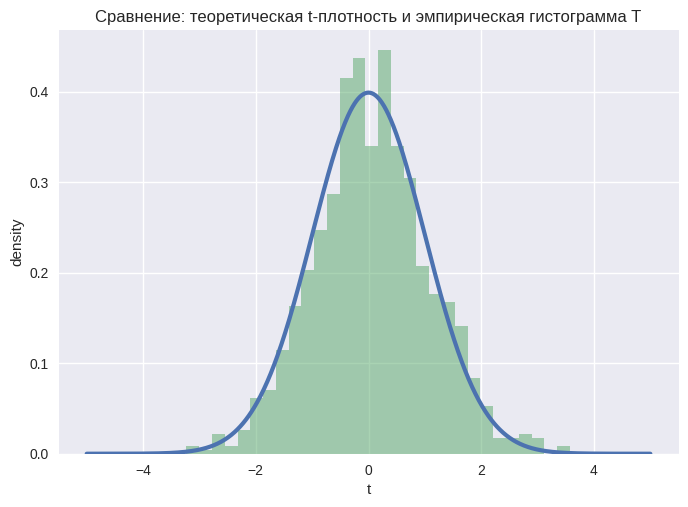

In [32]:
X = np.linspace(-5, 5, 1000)
pdf = stats.t(df=598).pdf(X)
plt.plot(X, pdf, lw=3)
plt.hist(T, bins=30, density=True, alpha=0.5)
plt.title("Сравнение: теоретическая t-плотность и эмпирическая гистограмма T")
plt.xlabel("t")
plt.ylabel("density");

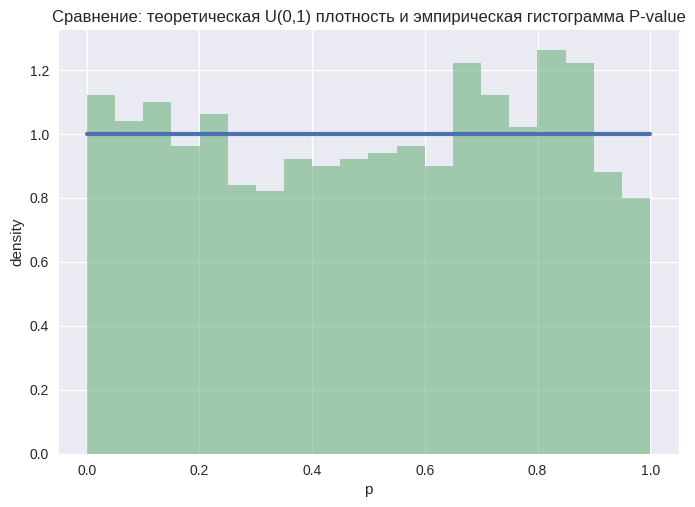

In [33]:
X = np.linspace(0, 1, 1000)
pdf = stats.uniform.pdf(X, loc=0, scale=1)
plt.plot(X, pdf, lw=3)
plt.hist(P, bins=20, density=True, alpha=0.5)
plt.title("Сравнение: теоретическая U(0,1) плотность и эмпирическая гистограмма P-value")
plt.xlabel("p")
plt.ylabel("density");